# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [259]:
#Import all the necessary modules
# Evaluate using Cross Validation
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [260]:
data = pandas.read_csv("pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [261]:
data.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
3,1,89,66,23,94,28.1,0.167,21,0
33,6,92,92,0,0,19.9,0.188,28,0
388,5,144,82,26,285,32.0,0.452,58,1
95,6,144,72,27,228,33.9,0.255,40,0
67,2,109,92,0,0,42.7,0.845,54,0
420,1,119,88,41,170,45.3,0.507,26,0
652,5,123,74,40,77,34.1,0.269,28,0
40,3,180,64,25,70,34.0,0.271,26,0
151,4,114,65,0,0,21.9,0.432,37,0
519,6,129,90,7,326,19.6,0.582,60,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [263]:
data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [264]:
data.replace(data.median, np.nan, inplace=True)
data.replace(to_replace=0, value = data.median(), inplace = True)

In [265]:
data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [266]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

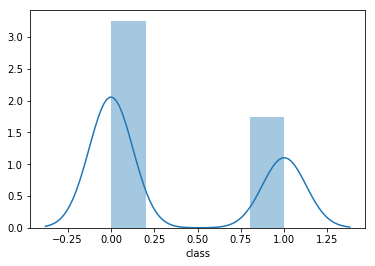

In [267]:
sns.distplot(data['class'] ,kde=True)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

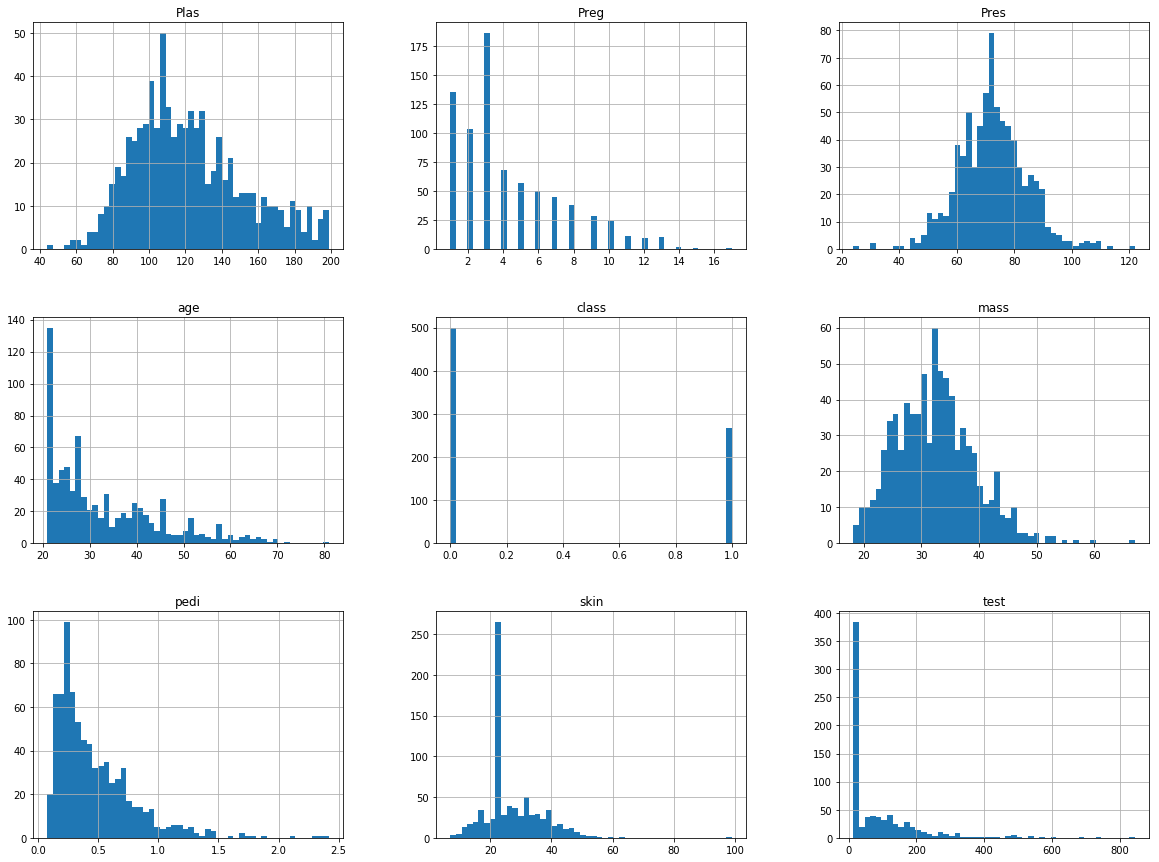

In [268]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
Diabetic=data[data['class']==1]
nonDiabetic=data[data['class']==0]
box_plot_data=[Diabetic.mass,nonDiabetic.mass]
plt.boxplot(box_plot_data,patch_artist=True,labels=['People who have diabetic','People who do not have diabetic'])
plt.show()

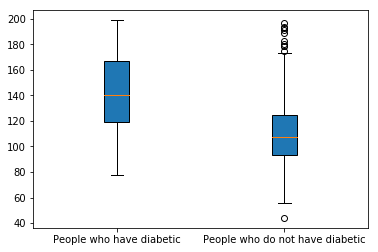

In [269]:
Diabetic=data[data['class']==1]
nonDiabetic=data[data['class']==0]
box_plot_data=[Diabetic.Plas,nonDiabetic.Plas]
plt.boxplot(box_plot_data,patch_artist=True,labels=['People who have diabetic','People who do not have diabetic'])
plt.show()

In [270]:
### There are outliers in both the data, however it is found that Plasmaglucose concentration, age and body mass index 
### Diabetic pedigree, 2hr serum insulin test data and age is skewed
## plasma value of diabetic is more than a non diabetic person
## not much of change in diabetic and non diabetic with respect to bmi from the box plots

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


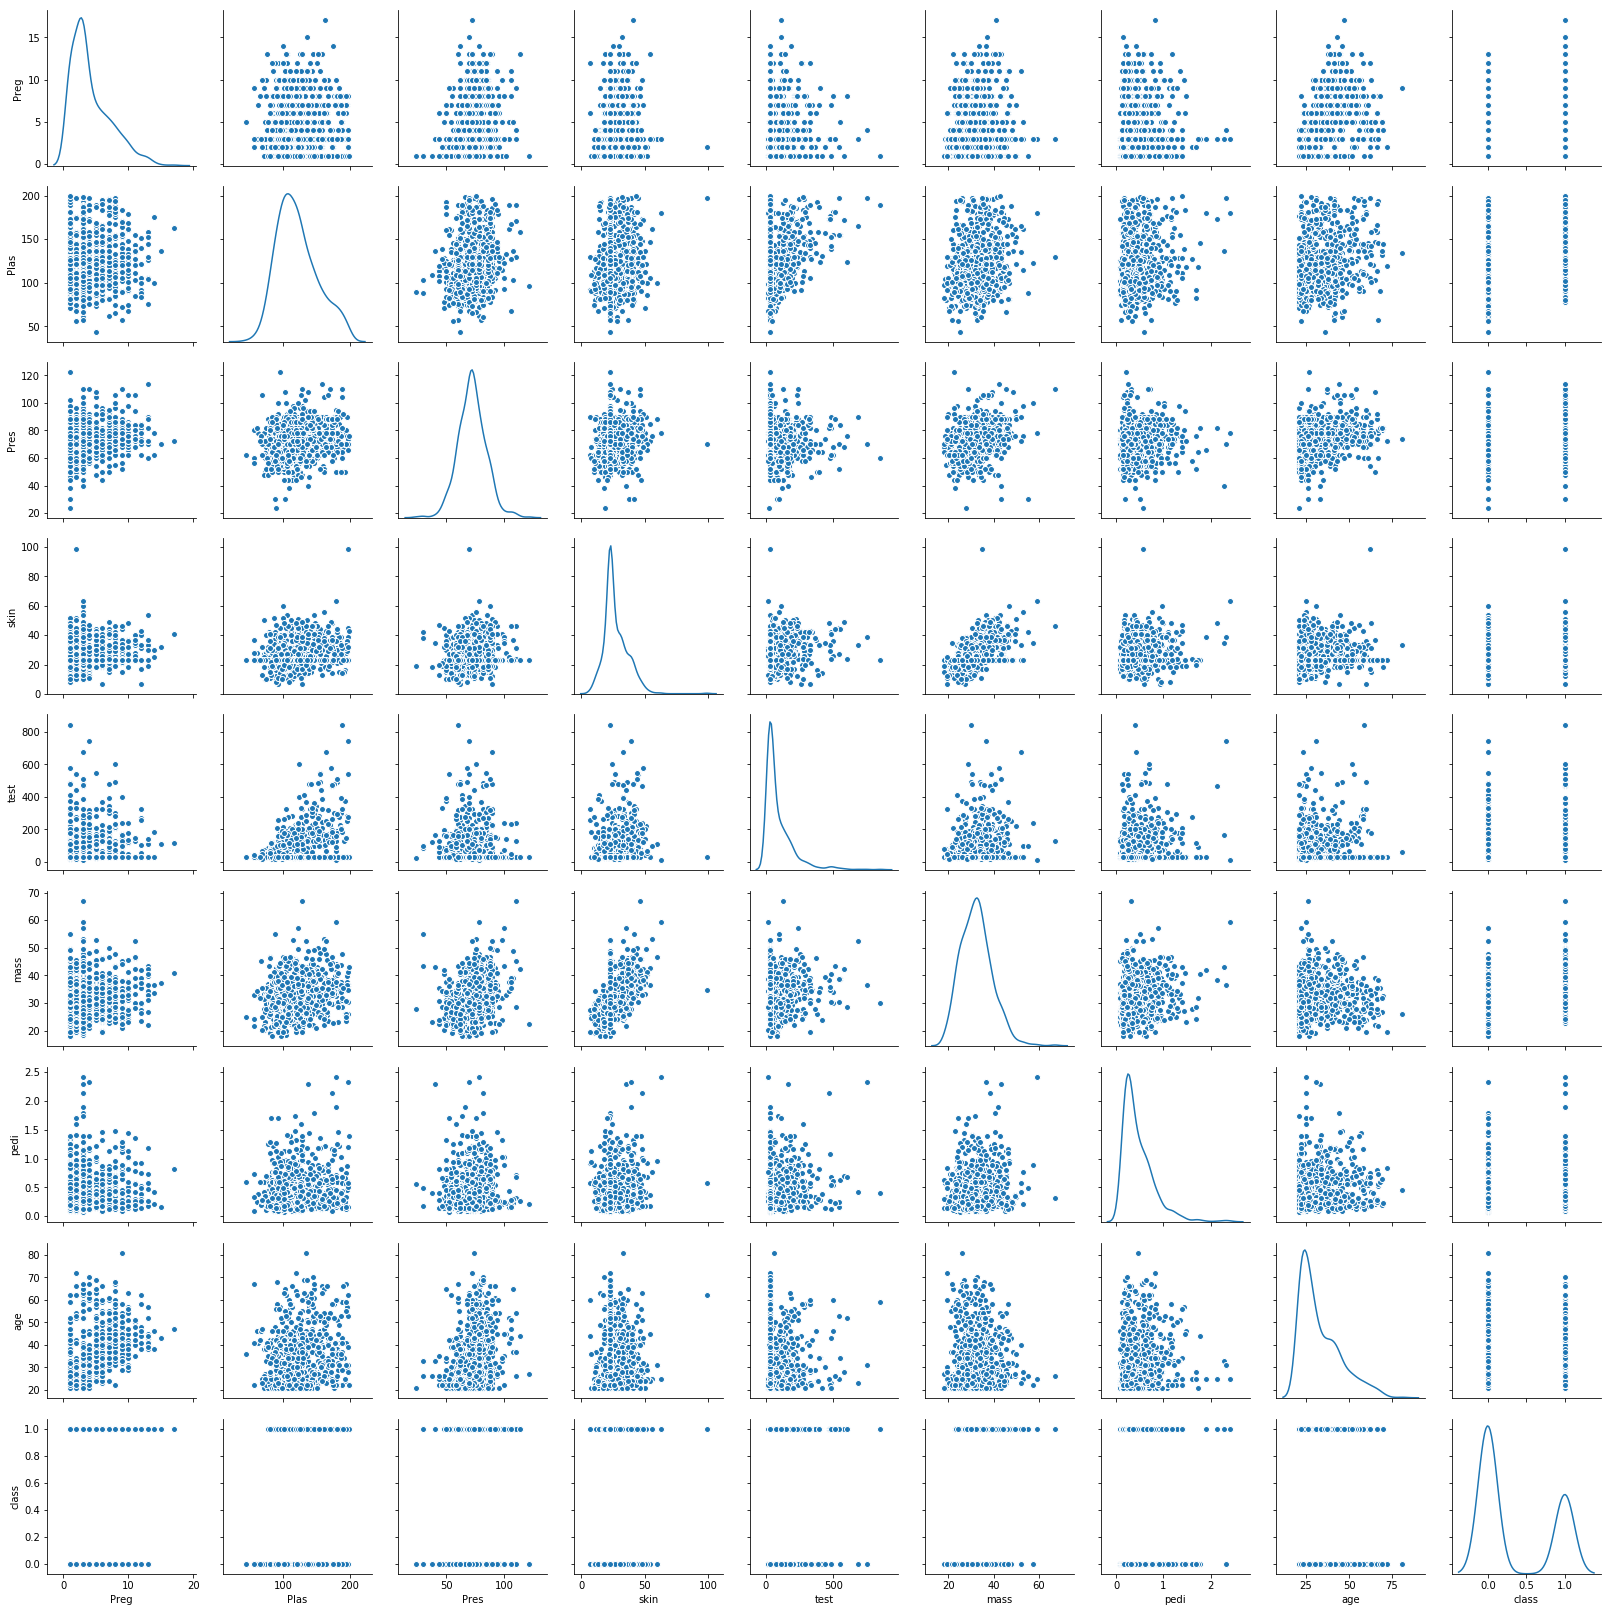

In [271]:
# Pairplot using sns
sns.pairplot(data, diag_kind='kde')

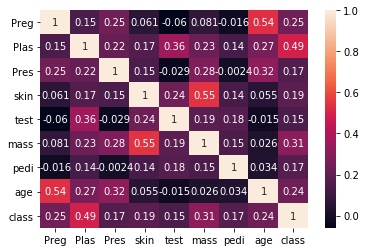

In [272]:
sns.heatmap(data.corr(), annot=True)

Using the plot - infer the relationship between different variables

#### Inference:
Plasma glucose conceentration and age and body mass index has a higher correlation with class variable.
Age has a good correlation with pregnancy.
bmi and skin has good correlation

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [273]:
X = data.drop(["class"], axis=1)
y = data[["class"]]
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [274]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [275]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (576, 8) (576, 1)
Testing dataset shape: (192, 8) (192, 1)


In [276]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=10)

In [277]:
#using k_feature foward selection with all 8 feature to see the best feature

In [278]:
sfs1 = sfs(dt_model, k_features=8, forward=True, scoring='accuracy', cv=5)

In [279]:
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [ ]:
sfs1.get_metric_dict()

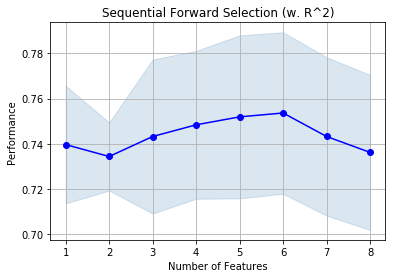

In [280]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

### Inference:
Nos of feature =3 has the maximum performace R^2 value, post this eventhough the score are high its not giving 
much of difference in over R^2 value

In [282]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols]
print(subsetColumnList)

[0, 1, 2, 3, 4, 5, 6, 7]
['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']


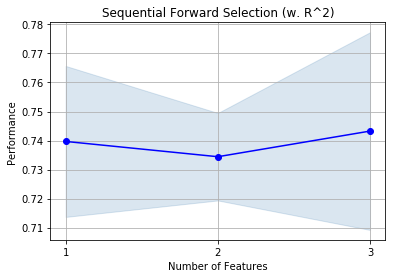

[1, 5, 7]
['Plas', 'mass', 'age']


In [283]:
### Select optimal set of features using backward elimination method for feature = 6

sfs1 = sfs(dt_model, k_features=3, forward=True, scoring='accuracy', cv=5)

sfs1 = sfs1.fit(x_train.values, y_train.values)

sfs1.get_metric_dict()

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols]
print(subsetColumnList)

In [284]:
##Build full model with selected feature on the selected model

final = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=10)
final.fit(x_train[subsetColumnList], y_train)
y_train_pred = final.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' %
final.score(x_train[subsetColumnList], y_train))
y_test_pred = final.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' %
final.score(x_test[subsetColumnList], y_test))

Training accuracy on selected features: 0.799
Testing accuracy on selected features: 0.760


In [285]:
y_grid = np.column_stack([y_test, y_test_pred])
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator,
                    out_file=dot_data,
                    feature_names=features,
                    class_names=classn,
                    filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return (graph)

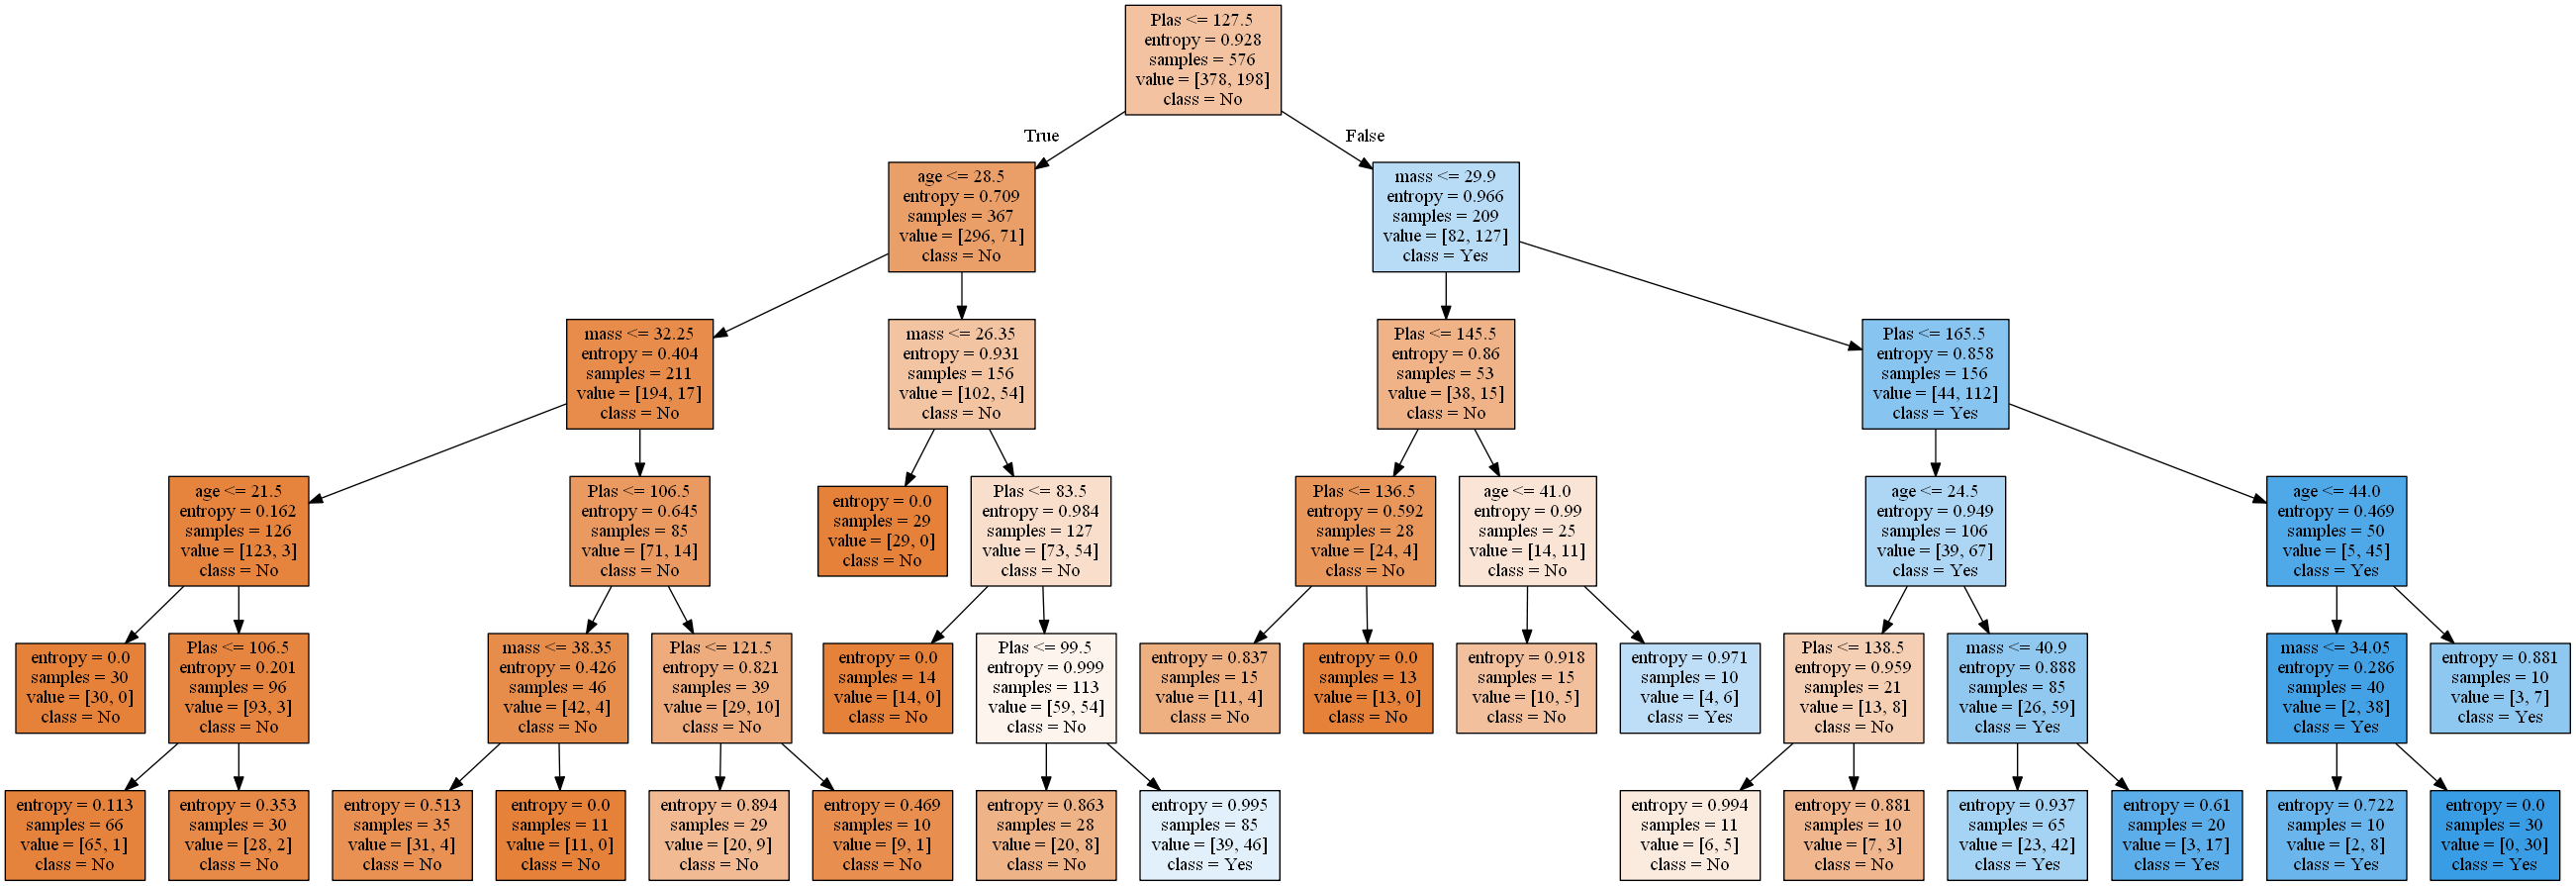

In [287]:
graph2, = print_tree(final,
                     features=x_train[subsetColumnList].columns,
                     class_names=['No', 'Yes'])
Image(graph2.create_png())

In [289]:
# Build full model on ALL features, for comparison
X = data.drop(["class"], axis=1)
y = data[["class"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=7)
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=10)
dt_model.fit(X_train, Y_train)
y_train_pred = dt_model.predict(X_train)
print('Training accuracy on selected features: %.3f' %
      dt_model.score(X_train, Y_train))
Y_test_pred = dt_model.predict(X_test)
print('Testing accuracy on selected features: %.3f' %
      dt_model.score(X_test, Y_test))

Training accuracy on selected features: 0.807
Testing accuracy on selected features: 0.698


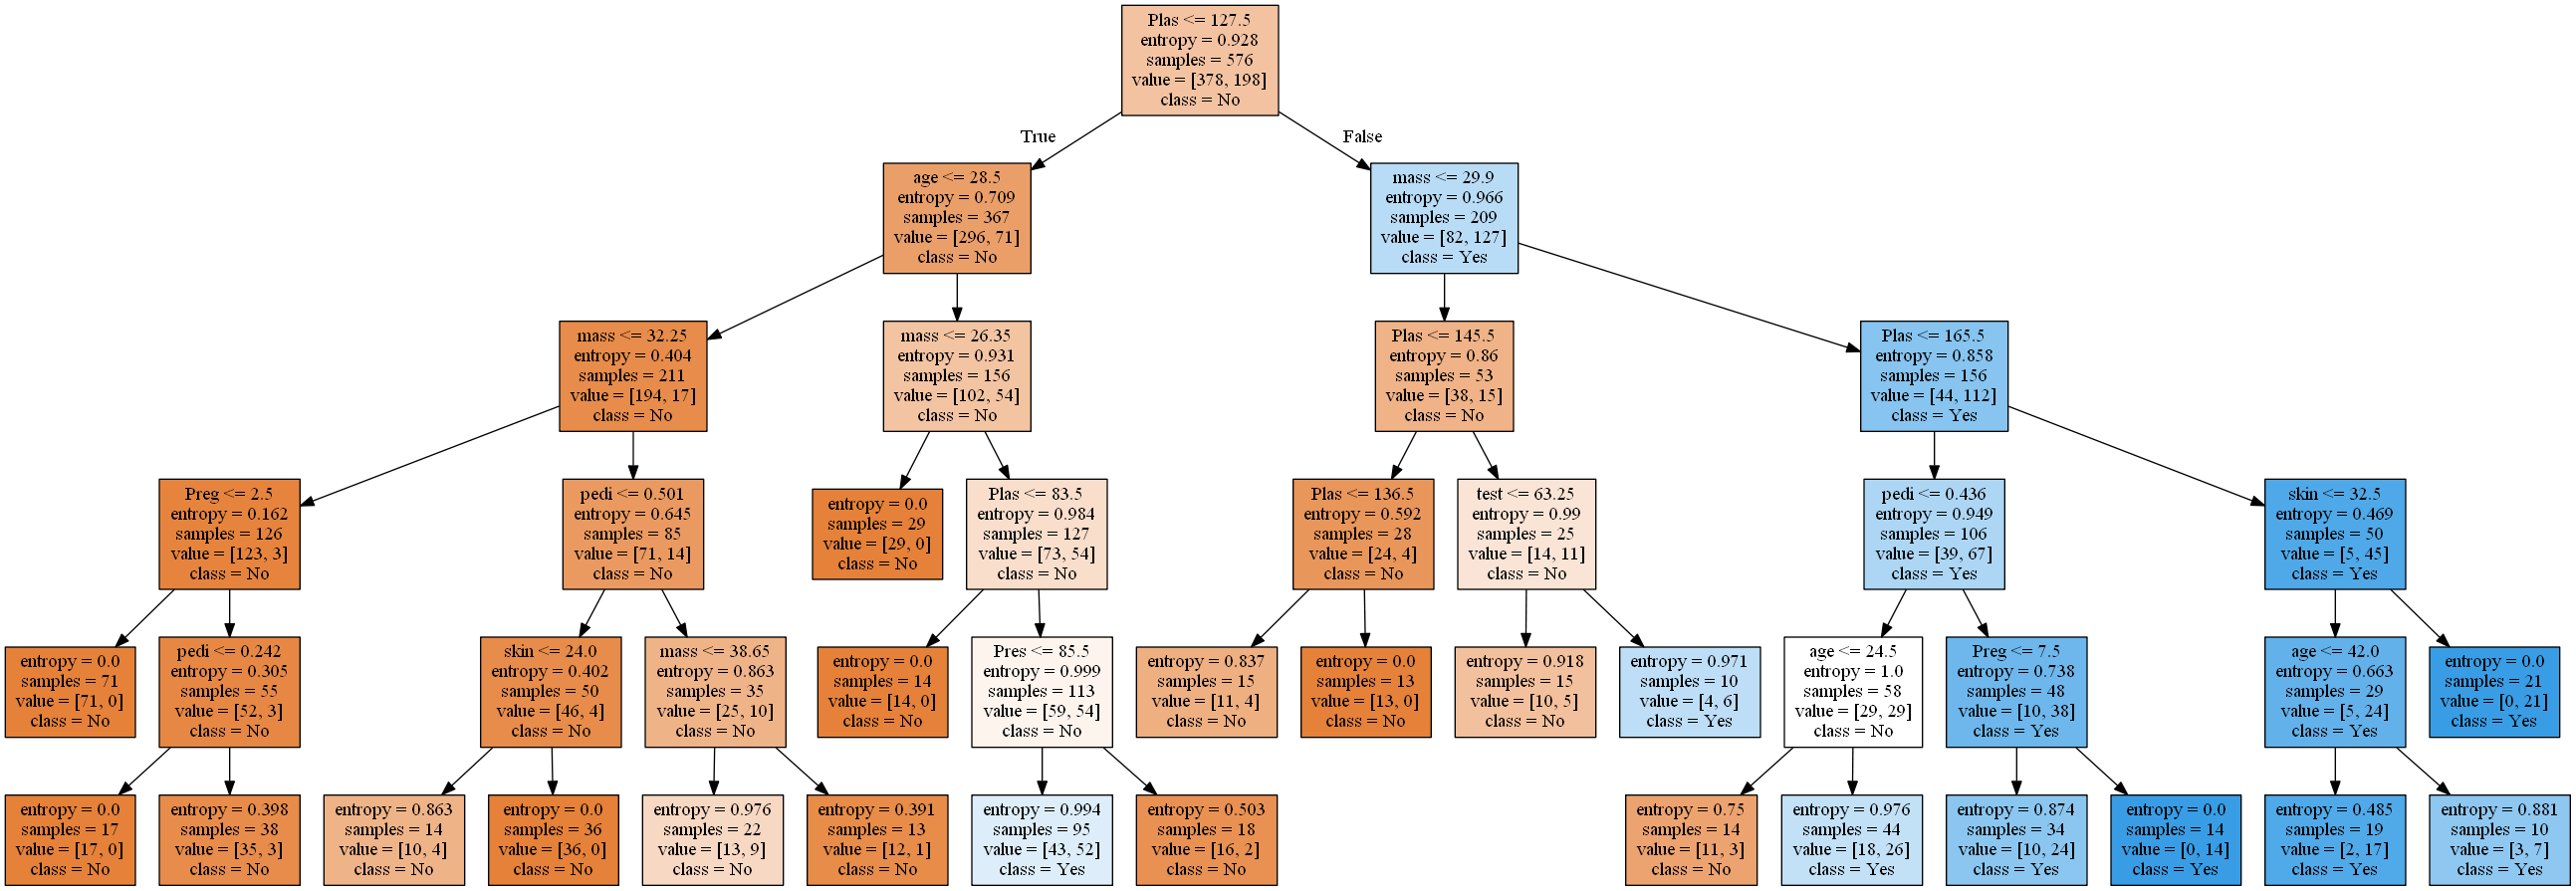

In [290]:
y_grid = np.column_stack([Y_test, Y_test_pred])
graph2, = print_tree(dt_model,
                     features=X_train.columns,
                     class_names=['No', 'Yes'])
Image(graph2.create_png())

# Q10 Print the accuracy of the model & print the confusion matrix 

In [291]:
###  final model with 3 feature selected using forward and backward seletion
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

#importing seaborn for statistical plots
y_train_pred = final.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' %
final.score(x_train[subsetColumnList], y_train))
y_test_pred = final.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' %
final.score(x_test[subsetColumnList], y_test))

results = confusion_matrix(y_test,predicted)
print('Confusion Matrix :')
print(results) 
print('Report : ')
print(classification_report(y_test, y_test_pred))

print('Accuracy Score of final model :',accuracy_score(y_test, y_test_pred)) 
print('Accuracy Score of full feature model :',accuracy_score(Y_test, Y_test_pred)) 

Training accuracy on selected features: 0.799
Testing accuracy on selected features: 0.760
Confusion Matrix :
[[84 38]
 [20 50]]
Report : 
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       122
           1       0.64      0.80      0.71        70

    accuracy                           0.76       192
   macro avg       0.75      0.77      0.75       192
weighted avg       0.78      0.76      0.76       192

Accuracy Score of final model : 0.7604166666666666
Accuracy Score of full feature model : 0.6979166666666666


Print the feature importance of the decision model - Optional

In [292]:
dt_model.feature_importances_

array([0.03903021, 0.42826229, 0.03911049, 0.0509492 , 0.00522606,
       0.23456495, 0.05561658, 0.14724022])

In [293]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols]
print(subsetColumnList)

[1, 5, 7]
['Plas', 'mass', 'age']


# Inference:
You can see that we are given an importance score for each attribute where the larger score the more important the attribute. The scores suggest at the importance of features plas, age and mass.